In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


# Load & Preprocessing

In [5]:
import zipfile

DATA_IN_PATH = '../input/quora-question-pairs/'
DATA_OUT_PATH = './'
file_list = ['train.csv.zip','test.csv.zip','sample_submission.csv.zip']
for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH+file,'r')
    zipRef.extractall(DATA_OUT_PATH)
    zipRef.close()

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [7]:
train_data = pd.read_csv('./train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
print('File Size:')
for file in os.listdir(DATA_OUT_PATH):
    if 'csv' in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_OUT_PATH+file)/1000000,2))+'MB')

File Size:
train.csv                     63.4MB
test.csv                      477.59MB
sample_submission.csv         22.35MB


In [9]:
print(train_data.shape)

(404290, 6)


In [10]:
train_data['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [11]:
(train_data['question1']+train_data['question2'])[0]

'What is the step by step guide to invest in share market in india?What is the step by step guide to invest in share market?'

In [12]:
train_set=pd.Series(train_data['question1'].tolist()+train_data['question2'].tolist()).astype(str)

In [13]:
train_set

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808575    How many keywords are there in PERL Programmin...
808576           Is it true that there is life after death?
808577                                    What's this coin?
808578    I am having little hairfall problem but I want...
808579        What is it like to have sex with your cousin?
Length: 808580, dtype: object

In [14]:
print(len(np.unique(train_set)))

537361


In [15]:
print(np.sum(train_set.value_counts()>1))

111873


In [16]:
# 80만개 데이터에서 53만 개의 unique, 27만 개의 2개이상 데이터, 27만 개의 중복 질문은 11개의 고유한 질문

Text(0, 0.5, 'Number of questions')

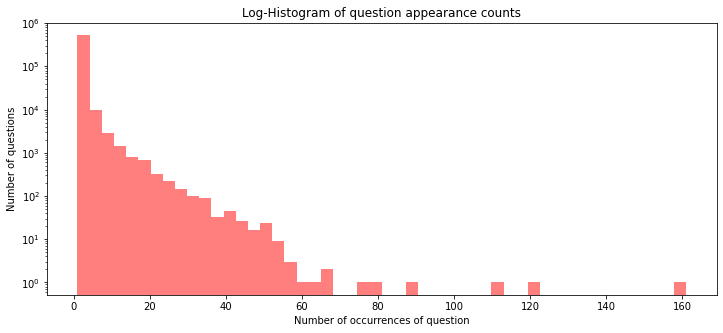

In [17]:
plt.figure(figsize=(12,5))
plt.hist(train_set.value_counts(),bins=50,alpha=.5,color='r',label='word')
plt.yscale('log',nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')

In [18]:
print(np.max(train_set.value_counts()))
print(np.min(train_set.value_counts()))
print(np.mean(train_set.value_counts()))
print(np.median(train_set.value_counts()))

161
1
1.50472401234924
1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb42a4fc510>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb42a4fcf90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb42a4f5fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb42a51ca90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb42a51cfd0>],
 'means': []}

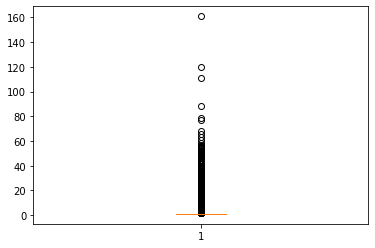

In [19]:
plt.boxplot(train_set.value_counts())

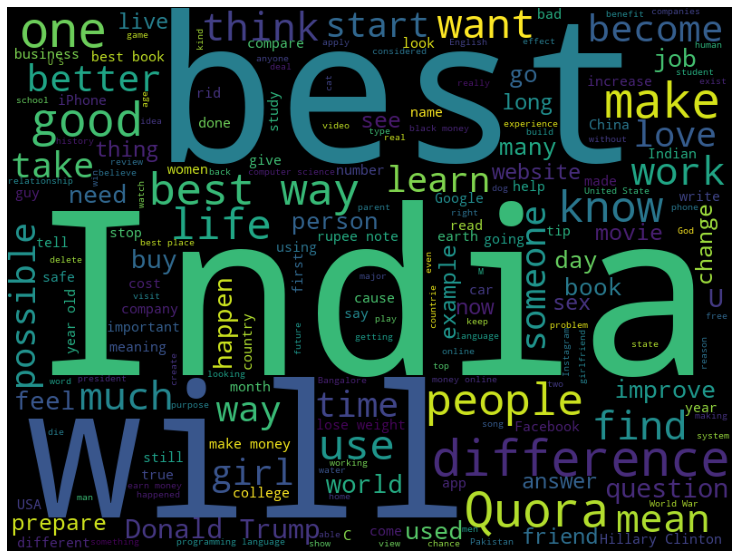

In [20]:
from wordcloud import WordCloud
cloud = WordCloud(width=800,height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [21]:
print(train_set.apply(lambda x: 'india' in x).value_counts())
print(train_set.apply(lambda x: 'best' in x).value_counts())
print(train_set.apply(lambda x: 'will' in x).value_counts())

False    806456
True       2124
dtype: int64
False    738875
True      69705
dtype: int64
False    788516
True      20064
dtype: int64


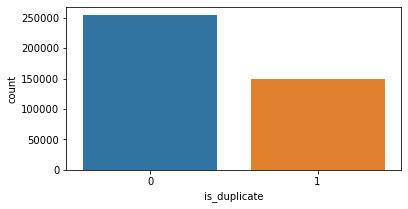

In [22]:
fig,ax = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['is_duplicate'])

Text(0, 0.5, 'Probability')

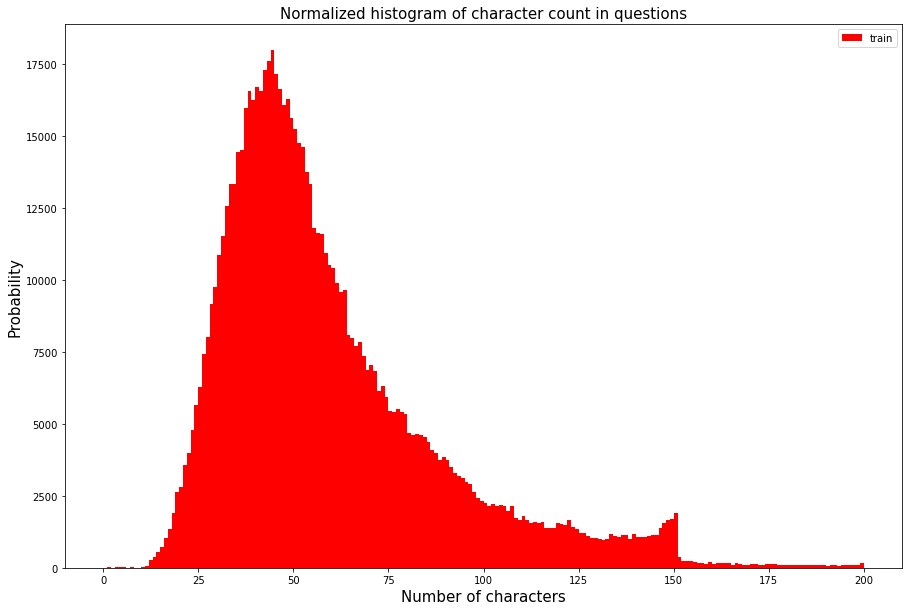

In [23]:
train_length = train_set.apply(len)
plt.figure(figsize=(15,10))
plt.hist(train_length,bins=200,range=[0,200],facecolor='r',label='train')
plt.title('Normalized histogram of character count in questions',fontsize=15)
plt.legend()
plt.xlabel('Number of characters',fontsize=15)
plt.ylabel('Probability',fontsize=15)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb42a48b390>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb42a490050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb42a48b310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb42a490c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb42a491190>],
 'means': [<matplotlib.lines.Line2D at 0x7fb42a491110>]}

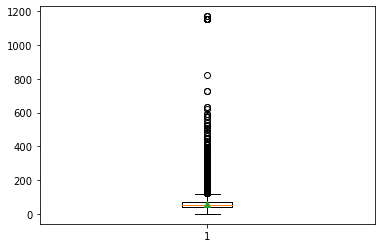

In [24]:
plt.boxplot(train_length,showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3e9d11b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb3e9939410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3e9d11450>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3e992a510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3e992a590>],
 'means': []}

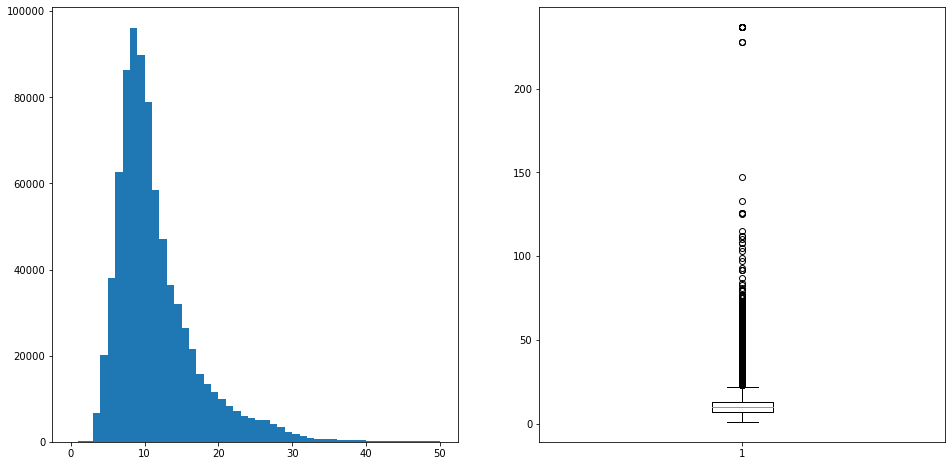

In [25]:
train_word_length = train_set.apply(lambda x:len(x.split()))
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(train_word_length,bins=50,range=[0,50])
ax[1].boxplot(train_word_length)

In [26]:
qmarks=np.mean(train_set.apply(lambda x: '?' in x))
math=np.mean(train_set.apply(lambda x: '[math]' in x))
fullstop=np.mean(train_set.apply(lambda x: '.' in x))
capital_first=np.mean(train_set.apply(lambda x: x[0].isupper()))
capitals=np.mean(train_set.apply(lambda x: any([y.isupper() for y in x])))
numbers=np.mean(train_set.apply(lambda x: any([y.isdigit() for y in x])))
print(qmarks,math,fullstop,capital_first,capitals,numbers)

0.9987385292735412 0.0011736624700091518 0.06308219347498083 0.9981325286304386 0.9995053055974672 0.11827153775755027


In [27]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = pd.read_csv('./train.csv',encoding='utf-8')

In [28]:
train_pos_data = train_data[train_data['is_duplicate'] == 1]
train_neg_data = train_data[train_data['is_duplicate'] != 1]

In [29]:
class_difference = len(train_neg_data)-len(train_pos_data)
sample_frac = 1-(class_difference/len(train_neg_data))
train_neg_data = train_neg_data.sample(frac=sample_frac)

In [30]:
train_pos_data.shape,train_neg_data.shape

((149263, 6), (149263, 6))

In [31]:
train_data = pd.concat([train_pos_data,train_neg_data])

In [32]:
train_data

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...,...,...,...
289421,289421,410540,410541,How do I unlock a PC without knowing and reset...,How do I unlock a PC without knowing and reset...,0
229139,229139,338371,338372,Why is fighting allowed in hockey?,How is a field hockey ball made?,0
15931,15931,30396,30397,I really love my childhood crush who happens t...,What should I do if I love a girl and she appa...,0
13769,13769,26409,26410,"Who would win if a fight, spider-man vs Hulk?","Who would win in a fight, Wolverine or the Hulk?",0


In [33]:
question1 = [str(s) for s in train_data['question1']]
question2 = [str(s) for s in train_data['question2']]

filtered_question1 = list()
filtered_question2 = list()

for q in question1:
    filtered_question1.append(re.sub('[^a-zA-Z ]',"",q).lower())
for q in question2:
    filtered_question2.append(re.sub('[^a-zA-Z ]',"",q).lower())

In [34]:
re.sub('[^a-zA-Z ]','',question1[0]).lower()

'astrology i am a capricorn sun cap moon and cap risingwhat does that say about me'

In [35]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()


In [36]:
tokenizer.fit_on_texts(filtered_question1+filtered_question2)
question1_sequence=tokenizer.texts_to_sequences(filtered_question1)
question2_sequence=tokenizer.texts_to_sequences(filtered_question2)

In [37]:
question1_sequence

[[2091, 5, 76, 7, 8905, 948, 4900, 768, 12, 4900, 44736, 21, 28, 244, 47, 63],
 [4, 13, 5, 22, 7, 40, 24856],
 [4, 9, 5, 211, 12, 86, 18, 260, 1648],
 [2, 13, 54, 592, 590, 6, 66],
 [2, 61, 32, 100, 1325, 298, 41],
 [2, 42, 7, 75, 891, 113, 14, 468, 478, 823, 261, 20, 33, 1596, 536],
 [2, 21, 11586, 113],
 [16, 11, 62, 82, 46, 753, 2887, 103, 28, 11, 9303, 1047, 20, 133],
 [16, 9, 8267, 259, 347],
 [4, 30, 5, 179, 14, 516, 942, 502],
 [2, 11, 25, 998, 7457, 14, 85, 31, 7, 1936, 28, 1123, 11919, 220, 1, 643],
 [2, 306, 10, 1226, 5679, 42, 22, 1, 52, 775, 6, 232, 15, 12298],
 [4, 9, 53, 179, 14, 1027],
 [2, 11, 25, 186, 10, 547, 28, 13, 22, 54, 34, 7150, 786],
 [4, 9, 5, 54, 269],
 [3, 251, 10424, 40, 14, 1406, 1634, 812, 498],
 [36, 7, 20534, 5158, 320, 20, 7, 1651, 5118, 1322, 24, 62, 4],
 [2, 3, 1, 19102, 5159, 149, 357, 78, 3901, 12, 16],
 [5,
  61,
  1655,
  5201,
  331,
  328,
  5,
  217,
  1099,
  18,
  328,
  235,
  12,
  169,
  6119,
  1,
  1066,
  292,
  3,
  180,
  1182,
  182

In [38]:
MAX_SEQUENCE_LENGTH = 31
q1_data=pad_sequences(sequences=question1_sequence,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
q2_data=pad_sequences(sequences=question2_sequence,maxlen=MAX_SEQUENCE_LENGTH,padding='post')


In [39]:
word_vocab = {}
word_vocab = tokenizer.word_index
word_vocab['<PAD>'] = 0

labels = np.array(train_data['is_duplicate'],dtype=int)

print(q1_data.shape)
print(q2_data.shape)
print(labels.shape)
print(len(word_vocab))

(298526, 31)
(298526, 31)
(298526,)
78406


In [40]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [41]:
TRAIN_Q1_DATA = 'q1_train.npy'
TRAIN_Q2_DATA = 'q2_train.npy'
TRAIN_LABEL_DATA = 'label_train.npy'
DATA_CONFIGS = 'data_configs.npy'

np.save(open(DATA_OUT_PATH+TRAIN_Q1_DATA,'wb'),q1_data)
np.save(open(DATA_OUT_PATH+TRAIN_Q2_DATA,'wb'),q2_data)
np.save(open(DATA_OUT_PATH+TRAIN_LABEL_DATA,'wb'),labels)

json.dump(data_configs,open(DATA_OUT_PATH+DATA_CONFIGS,'w'))

In [42]:
test_data = pd.read_csv(DATA_OUT_PATH+'test.csv',encoding='utf-8')
valid_ids = [type(x) == int for x in test_data.test_id]
test_data = test_data[valid_ids].drop_duplicates()


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
test_question1 = [str(s) for s in test_data['question1']]
test_question2 = [str(s) for s in test_data['question2']]

filtered_test_question1 = list()
filtered_test_question2 = list()

for q in test_question1:
    filtered_test_question1.append(re.sub('[^a-zA-Z ]',"",q).lower())
for q in test_question2:
    filtered_test_question2.append(re.sub('[^a-zA-Z ]',"",q).lower())

In [44]:
test_question1_sequence = tokenizer.texts_to_sequences(filtered_test_question1)
test_q1_data=pad_sequences(test_question1_sequence,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

test_question2_sequence = tokenizer.texts_to_sequences(filtered_test_question2)
test_q2_data=pad_sequences(test_question2_sequence,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

In [45]:
test_id = np.array(test_data['test_id'])
print(test_q1_data.shape)
print(test_q2_data.shape)
print(test_id.shape)

(2345796, 31)
(2345796, 31)
(2345796,)


In [46]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_OUT_PATH+TEST_Q1_DATA,'wb'),test_q1_data)
np.save(open(DATA_OUT_PATH+TEST_Q2_DATA,'wb'),test_q2_data)
np.save(open(DATA_OUT_PATH+TEST_ID_DATA,'wb'),test_id)

# Modeling

In [47]:
DATA_OUT_PATH = './'
import numpy as np
TRAIN_Q1_DATA = 'q1_train.npy'
TRAIN_Q2_DATA = 'q2_train.npy'
TRAIN_ID_DATA = 'label_train.npy'

In [48]:
# train_q1_data = np.load(open(DATA_OUT_PATH+TRAIN_Q1_DATA),'rb')
# train_q2_data = np.load(open(DATA_OUT_PATH+TRAIN_Q2_DATA),'rb')
# train_labels = np.load(open(DATA_OUT_APTH+TRAIN_ID_DATA),'rb')

with open(DATA_OUT_PATH+TRAIN_Q1_DATA,'rb') as f:
    train_q1_data = np.load(f)
with open(DATA_OUT_PATH+TRAIN_Q2_DATA,'rb') as f:
    train_q2_data = np.load(f)
with open(DATA_OUT_PATH+TRAIN_ID_DATA,'rb') as f:
    train_labels = np.load(f)

In [49]:
print(train_q1_data.shape)
print(train_q2_data.shape)
print(train_labels.shape)

(298526, 31)
(298526, 31)
(298526,)


In [50]:
train_input=np.stack([train_q1_data,train_q2_data],axis=1)
train_input.shape

(298526, 2, 31)

In [51]:
from sklearn.model_selection import train_test_split

train_input, eval_input, train_label, eval_label = train_test_split(train_input,train_labels,test_size=0.2,random_state=25)

# XGBOOST

In [52]:
import xgboost as xgb

train_data = xgb.DMatrix(train_input.sum(axis=1),label=train_label)
eval_data = xgb.DMatrix(eval_input.sum(axis=1),label=eval_label)

data_list = [(train_data,'train'),(eval_data,'valid')]

In [53]:
params={}

params['objective'] = 'binary:logistic'
params['eval_metric'] = 'rmse'

bst = xgb.train(params, train_data, num_boost_round = 1000, evals = data_list, early_stopping_rounds=10)

[0]	train-rmse:0.48357	valid-rmse:0.48400
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.47357	valid-rmse:0.47451
[2]	train-rmse:0.46673	valid-rmse:0.46807
[3]	train-rmse:0.46170	valid-rmse:0.46341
[4]	train-rmse:0.45815	valid-rmse:0.46035
[5]	train-rmse:0.45543	valid-rmse:0.45794
[6]	train-rmse:0.45360	valid-rmse:0.45631
[7]	train-rmse:0.45188	valid-rmse:0.45477
[8]	train-rmse:0.45045	valid-rmse:0.45364
[9]	train-rmse:0.44920	valid-rmse:0.45256
[10]	train-rmse:0.44647	valid-rmse:0.45003
[11]	train-rmse:0.44561	valid-rmse:0.44929
[12]	train-rmse:0.44518	valid-rmse:0.44894
[13]	train-rmse:0.44402	valid-rmse:0.44800
[14]	train-rmse:0.44347	valid-rmse:0.44763
[15]	train-rmse:0.44291	valid-rmse:0.44722
[16]	train-rmse:0.44263	valid-rmse:0.44701
[17]	train-rmse:0.44173	valid-rmse:0.44635
[18]	train-rmse:0.44150	valid-rmse:0.44619
[19]	train-rmse:0.44124	valid-rmse:0.44604
[20]	

[186]	train-rmse:0.40368	valid-rmse:0.42601
[187]	train-rmse:0.40366	valid-rmse:0.42600
[188]	train-rmse:0.40349	valid-rmse:0.42598
[189]	train-rmse:0.40342	valid-rmse:0.42596
[190]	train-rmse:0.40340	valid-rmse:0.42595
[191]	train-rmse:0.40338	valid-rmse:0.42594
[192]	train-rmse:0.40331	valid-rmse:0.42594
[193]	train-rmse:0.40327	valid-rmse:0.42593
[194]	train-rmse:0.40314	valid-rmse:0.42589
[195]	train-rmse:0.40303	valid-rmse:0.42584
[196]	train-rmse:0.40303	valid-rmse:0.42583
[197]	train-rmse:0.40302	valid-rmse:0.42582
[198]	train-rmse:0.40299	valid-rmse:0.42582
[199]	train-rmse:0.40276	valid-rmse:0.42573
[200]	train-rmse:0.40257	valid-rmse:0.42572
[201]	train-rmse:0.40251	valid-rmse:0.42569
[202]	train-rmse:0.40238	valid-rmse:0.42566
[203]	train-rmse:0.40214	valid-rmse:0.42559
[204]	train-rmse:0.40209	valid-rmse:0.42559
[205]	train-rmse:0.40184	valid-rmse:0.42551
[206]	train-rmse:0.40160	valid-rmse:0.42549
[207]	train-rmse:0.40137	valid-rmse:0.42547
[208]	train-rmse:0.40117	valid-r

[373]	train-rmse:0.37982	valid-rmse:0.42053
[374]	train-rmse:0.37972	valid-rmse:0.42052
[375]	train-rmse:0.37958	valid-rmse:0.42051
[376]	train-rmse:0.37949	valid-rmse:0.42050
[377]	train-rmse:0.37946	valid-rmse:0.42050
[378]	train-rmse:0.37945	valid-rmse:0.42049
[379]	train-rmse:0.37943	valid-rmse:0.42049
[380]	train-rmse:0.37940	valid-rmse:0.42048
[381]	train-rmse:0.37919	valid-rmse:0.42039
[382]	train-rmse:0.37905	valid-rmse:0.42039
[383]	train-rmse:0.37894	valid-rmse:0.42034
[384]	train-rmse:0.37878	valid-rmse:0.42033
[385]	train-rmse:0.37859	valid-rmse:0.42030
[386]	train-rmse:0.37834	valid-rmse:0.42027
[387]	train-rmse:0.37811	valid-rmse:0.42020
[388]	train-rmse:0.37791	valid-rmse:0.42015
[389]	train-rmse:0.37773	valid-rmse:0.42012
[390]	train-rmse:0.37762	valid-rmse:0.42011
[391]	train-rmse:0.37757	valid-rmse:0.42010
[392]	train-rmse:0.37749	valid-rmse:0.42009
[393]	train-rmse:0.37747	valid-rmse:0.42008
[394]	train-rmse:0.37744	valid-rmse:0.42008
[395]	train-rmse:0.37742	valid-r

[560]	train-rmse:0.35980	valid-rmse:0.41746
[561]	train-rmse:0.35979	valid-rmse:0.41746
[562]	train-rmse:0.35978	valid-rmse:0.41746
[563]	train-rmse:0.35975	valid-rmse:0.41744
[564]	train-rmse:0.35971	valid-rmse:0.41745
[565]	train-rmse:0.35969	valid-rmse:0.41746
[566]	train-rmse:0.35966	valid-rmse:0.41746
[567]	train-rmse:0.35965	valid-rmse:0.41746
[568]	train-rmse:0.35960	valid-rmse:0.41746
[569]	train-rmse:0.35954	valid-rmse:0.41745
[570]	train-rmse:0.35945	valid-rmse:0.41745
[571]	train-rmse:0.35927	valid-rmse:0.41741
[572]	train-rmse:0.35925	valid-rmse:0.41740
[573]	train-rmse:0.35924	valid-rmse:0.41739
[574]	train-rmse:0.35917	valid-rmse:0.41737
[575]	train-rmse:0.35906	valid-rmse:0.41735
[576]	train-rmse:0.35903	valid-rmse:0.41734
[577]	train-rmse:0.35902	valid-rmse:0.41733
[578]	train-rmse:0.35896	valid-rmse:0.41731
[579]	train-rmse:0.35882	valid-rmse:0.41725
[580]	train-rmse:0.35874	valid-rmse:0.41722
[581]	train-rmse:0.35874	valid-rmse:0.41721
[582]	train-rmse:0.35869	valid-r

In [54]:
# !pip install numpy==1.16.1
# import numpy as np

In [55]:
# import numpy as np
# # save np.load
# np_load_old = np.load

# # modify the default parameters of np.load
# np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# # call load_data with allow_pickle implicitly set to true
# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# a
# # restore np.load for future normal usage
# np.load = np_load_old

In [56]:


TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'
with open(DATA_OUT_PATH+TEST_Q1_DATA,'rb') as f:
    test_q1_data = np.load(f,allow_pickle=True)
with open(DATA_OUT_PATH+TEST_Q2_DATA,'rb') as f:
    test_q2_data = np.load(f,allow_pickle=True)
with open(DATA_OUT_PATH+TEST_ID_DATA,'rb') as f:
    test_id = np.load(f,allow_pickle=True)

test_input = np.stack([test_q1_data,test_q2_data],axis=1)
test_data = xgb.DMatrix(test_input.sum(axis=1))
test_predict = bst.predict(test_data)

output = pd.DataFrame({'test_id':test_id,'is_duplicate':test_predict})
output.to_csv('./simple_xgb.csv',index=False)

# CNN

In [60]:
prepro_configs = json.load(open(DATA_OUT_PATH+DATA_CONFIGS,'r'))

In [64]:
# train_q1_data
# train_q2_data
# train_labels

# test_q1_data
# test_q2_data
# test_id

In [67]:
class SentenceEmbedding(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super(SentenceEmbedding,self).__init__()
        self.conv = tf.keras.layers.Conv1D(kargs['conv_num_filters'],kargs['conv_window_size'],activation=tf.keras.activations.relu,padding='same')
        self.max_pool = tf.keras.layers.MaxPool1D(kargs['max_pool_seq_len'],1)
        self.dense = tf.keras.layers.Dense(kargs['sent_embedding_dimension'],activation=tf.keras.activations.relu)
        
    def call(self,x):
        x = self.conv(x)
        x = self.max_pool(x)
        x = self.dense(x)
        
        return tf.squeeze(x, 1)
    

In [82]:
# 31개의 단어 나열된 index로 이루어진 문장 -> 128d로 임베딩된 31개의 단어로 이루어져 있는 문장 -> 256d의 1개의 벡터로 변환
x = train_q1_data
print(x.shape)
x =tf.keras.layers.Embedding(prepro_configs['vocab_size'],128)(x)
print(x.shape)
x = tf.keras.layers.Conv1D(10,5,activation=tf.keras.activations.relu,padding='same')(x)
print(x.shape)
x = tf.keras.layers.MaxPool1D(31,1)(x)
print(x.shape)
x = tf.keras.layers.Dense(256,activation=tf.keras.activations.relu)(x)
print(x.shape)

(298526, 31)
(298526, 31, 128)
(298526, 31, 10)
(298526, 1, 10)
(298526, 1, 256)


In [128]:
class SentenceSimilarityModel(tf.keras.Model):
    def __init__(self, **kargs):
        super(SentenceSimilarityModel, self).__init__(name=kargs['model_name'])
        self.word_embedding = tf.keras.layers.Embedding(kargs['vocab_size'],kargs['word_embedding_dimension'])
        self.base_encoder = SentenceEmbedding(**kargs)
        self.hypo_encoder = SentenceEmbedding(**kargs)
        self.dense = tf.keras.layers.Dense(kargs['hidden_dimension'],activation=tf.keras.activations.relu)
        self.logit = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
        self.dropout = tf.keras.layers.Dropout(kargs['dropout_rate'])
        
    def call(self,x):
        x1, x2 = x
        b_x = self.word_embedding(x1)
        h_x = self.word_embedding(x2)
        b_x = self.dropout(b_x)
        h_x = self.dropout(h_x)
        
        b_x = self.base_encoder(b_x)
        h_x = self.hypo_encoder(h_x)
        
        e_x = tf.concat([b_x,h_x],-1)
        e_x = self.dense(e_x)
        e_x = self.dropout(e_x)
        
        return self.logit(e_x)
    
    def build_graph(self):
        x = tf.keras.Input(shape=(31))
        y = tf.keras.Input(shape=(31))
        return tf.keras.Model(inputs=[x,y], outputs=self.call([x,y]))

In [129]:
model_name = 'cnn_similarity'
BATCH_SIZE = 1024
NUM_EPOCHS = 100
VALID_SPLIT = 0.1
MAX_LEN = 31

kargs={'model_name':model_name,
      'vocab_size':prepro_configs['vocab_size'],
      'word_embedding_dimension':100,
      'conv_num_filters':300,
      'conv_window_size':3,
      'max_pool_seq_len':MAX_LEN,
      'sent_embedding_dimension':128,
      'dropout_rate':0.2,
      'hidden_dimension':200,
      'output_dimension':1}

In [132]:
Model = SentenceSimilarityModel(**kargs)
Model.build_graph().summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 31)]         0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           [(None, 31)]         0                                            
__________________________________________________________________________________________________
embedding_23 (Embedding)        (None, 31, 100)      7840600     input_16[0][0]                   
                                                                 input_17[0][0]                   
__________________________________________________________________________________________________
dropout_16 (Dropout)            multiple             0           embedding_23[0][0]    

In [141]:
Model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),loss=tf.keras.losses.BinaryCrossentropy(),metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=1)
checkpoint_path = DATA_OUT_PATH+model_name+'/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print('{} -- Folder already exists'.format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir,exist_ok=True)
    print('{} -- Folder create complete'.format(checkpoint_dir))
    
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

history = Model.fit((train_q1_data,train_q2_data),labels,batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_split=VALID_SPLIT,callbacks=[earlystop_callback,cp_callback])
# TIME CONSUMING PROCESS - (skip)

./cnn_similarity -- Folder already exists
Epoch 1/100
  9/263 [>.............................] - ETA: 1:45 - loss: 0.4083 - accuracy: 0.8132

KeyboardInterrupt: 

# MaLSTM

In [146]:
class MaLSTM(tf.keras.Model):
    def __init__(self, **kargs):
        super(MaLSTM,self).__init__(name=model_name)
        self.embedding = tf.keras.layers.Embedding(input_dim=kargs['vocab_size'],output_dim=kargs['embedding_dimension'])
        self.lstm = tf.keras.layers.LSTM(units=kargs['lstm_dimension'])
        
    def call(self,x):
        x1,x2 = x
        x1 = self.embedding(x1)
        x2 = self.embedding(x2)
        x1 = self.lstm(x1)
        x2 = self.lstm(x2)
        x = tf.exp(-tf.reduce_sum(tf.abs(x1-x2),axis=1))
        return x


In [151]:
model_name = 'malstm_similarity'
BATCH_SIZE = 128
NUM_EPOCHS=5
VALID_SPLIT = 0.1

kargs = {
    'vocab_size':prepro_configs['vocab_size'],
    'embedding_dimension':100,
    'lstm_dimension':150,
    
}

model = MaLSTM(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),loss=tf.keras.losses.BinaryCrossentropy(),metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])


In [154]:
history = model.fit((q1_data,q2_data),labels,batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_split=VALID_SPLIT,callbacks=[earlystop_callback,cp_callback])
# TEST SET LOSS 0.54

Epoch 1/5
 162/2100 [=>............................] - ETA: 5:20 - loss: 0.7219 - accuracy: 0.6377

KeyboardInterrupt: 